In [0]:
# theta here is weight.
#step size alpha=0.0001

# Import libraries
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# Use iris data from sklearn
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data[50:, 2:]
iris_target = iris.target[50:] - 1

x1 = iris_data[:,0]
x2 = iris_data[:,1]
w = np.random.rand(3)
c = iris_target

data = np.array([x1,x2,c]).T
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]


# Sigmoid function
def sigmoid(z):
    return(1. / (1. + np.exp(-z)))

# Log-likehood function
def CostFunction(X,y, theta):
    m = len(y)
    # sigmoid(wTx)
    h = sigmoid(np.dot(X, theta))
    j = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    return j

# Gradient of Cross Entropy 
def gradient(X, y, theta):
    y_hat = sigmoid(np.dot(X, theta))  
    return np.dot(X.T, (y_hat - y))

#Gradient Decent Method
def gradient_decent_error (X, y, theta, alpha=0.0001, verbose=True):
    cost = CostFunction(X, y, theta)[0][0]
    cost_prev = np.inf
    itera = 0
    history = [cost]
    timehis = []
    
    time_all_start = time.time()
    while cost_prev - cost > .00000001:
        if itera % 50000 == 0 and verbose == True: 
            print(f"Iteration:{itera:<9}  Cost:{cost:<12.10}  Previous cost:{cost_prev:<12.10}")
        cost_prev = cost
        start = time.time()
        h = sigmoid(X.dot(theta))
        theta = theta - alpha * gradient(X,y,theta)
        elapsed = time.time() - start
        cost = CostFunction(X,y,theta)[0][0]
        history.append(float(cost))
        timehis.append(float(elapsed))
        itera = itera + 1
        
    time_all = time.time() - time_all_start
    print(f"alpha:{alpha:<6.5}  Total iterations:{itera:}  Final cost:{history[-1]:<.10}  Total time:{time_all:<.3}ms" )
    return(theta, itera, history, timehis)

Iteration:0          Cost:0.6931471806  Previous cost:inf         
Iteration:50000      Cost:0.201940606   Previous cost:0.2019419643
Iteration:100000     Cost:0.1623657079  Previous cost:0.1623661789
Iteration:150000     Cost:0.145345434   Previous cost:0.1453456814
Iteration:200000     Cost:0.1355749176  Previous cost:0.1355750723
Iteration:250000     Cost:0.1291641989  Previous cost:0.1291643053
Iteration:300000     Cost:0.124615775   Previous cost:0.1246158527
Iteration:350000     Cost:0.1212178923  Previous cost:0.1212179516
Iteration:400000     Cost:0.1185848453  Previous cost:0.118584892 
Iteration:450000     Cost:0.1164878486  Previous cost:0.1164878863
Iteration:500000     Cost:0.1147818944  Previous cost:0.1147819253
Iteration:550000     Cost:0.1133702843  Previous cost:0.11337031  
Iteration:600000     Cost:0.1121858905  Previous cost:0.1121859123
Iteration:650000     Cost:0.1111805678  Previous cost:0.1111805864
Iteration:700000     Cost:0.1103188404  Previous cost:0.110318

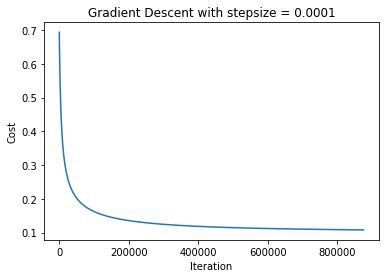

In [34]:
initial_theta = np.zeros(X.shape[1])
theta = initial_theta.reshape(-1,1)
alpha = 0.0001
theta, itera, Cost_h, Time_h= gradient_decent_error( X, y, theta, alpha)

print(f"Weight: {theta}") 
plt.figure()
plt.title(f"Gradient Descent with stepsize = {alpha}")
plt.plot(range(itera+1), Cost_h)
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.show()

alpha:0.1     Total iterations:1  Final cost:8.040150291  Total time:0.000129ms


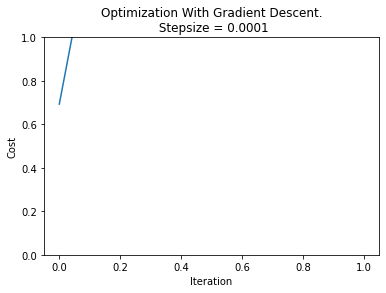

alpha:0.01    Total iterations:1  Final cost:0.9525230396  Total time:0.0001ms


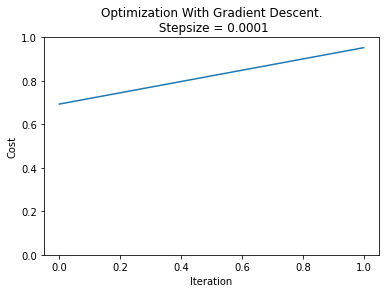

alpha:0.008   Total iterations:1  Final cost:0.849337479  Total time:0.000131ms


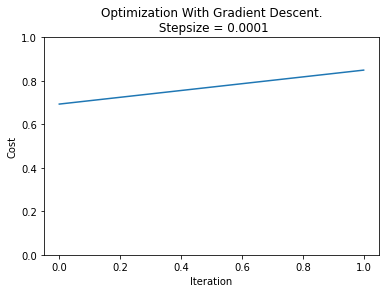

alpha:0.006   Total iterations:1  Final cost:0.7667147788  Total time:0.000226ms


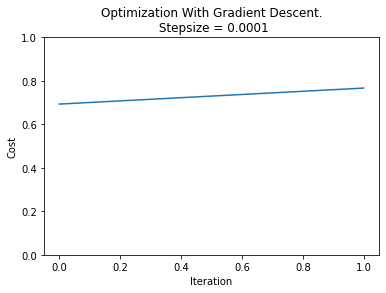

alpha:0.004   Total iterations:1  Final cost:0.7099809285  Total time:0.000249ms


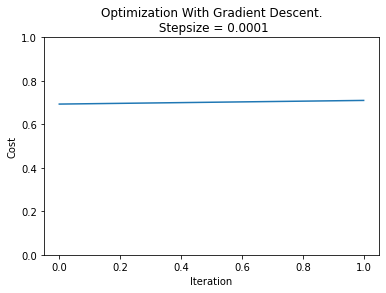

alpha:0.003   Total iterations:3  Final cost:0.6925663089  Total time:0.000311ms


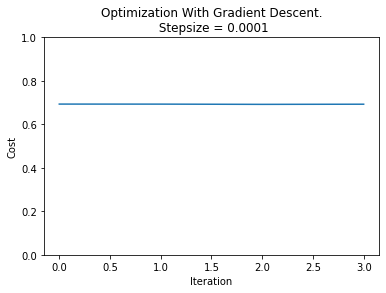

alpha:0.002   Total iterations:132442  Final cost:0.1032274382  Total time:5.07ms


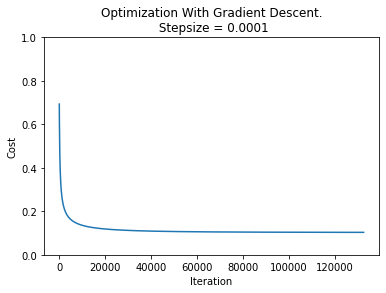

alpha:0.001   Total iterations:214718  Final cost:0.1035874271  Total time:8.12ms


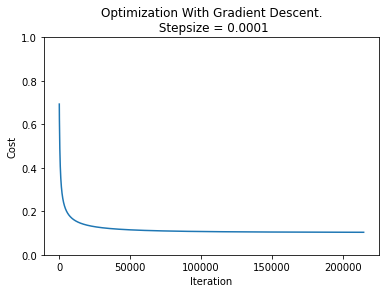

alpha:0.0005  Total iterations:339092  Final cost:0.1042346679  Total time:12.7ms


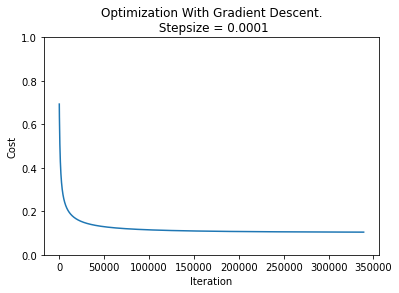

In [35]:
# Tuning for stepsize: alpha
def gradient_decent_tune (X,y,theta, alpha_candidate):
    init_theta = theta
    for alpha in alpha_candidate:
        theta, itera, Cost_h, Time_h= gradient_decent_error( X, y, init_theta, alpha, verbose=False)
        
        plt.figure()
        plt.title(f"Gradient Descent with stepsize = {alpha}")
        plt.title(title)
        plt.plot(range(itera+1), Cost_h)
        plt.ylabel('Cost')
        plt.ylim(0,1)
        plt.xlabel('Iteration')
        plt.show()
        

alpha_can = [0.1, 0.01, 0.008, 0.006,  0.004, 0.003, 0.002, 0.001, 0.0005]
initial_theta = np.zeros(X.shape[1])
theta = initial_theta.reshape(-1,1)

gradient_decent_tune( X, y, theta, alpha_can)